In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
import seaborn as sns

# Load data
data = pd.read_csv('housing.csv')


In [3]:
data = pd.read_csv('housing.csv')
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
# Select features
features = ['longitude', 'latitude', 'median_house_value', 'median_income']
select_df = data[features]

# Scale the features
X = StandardScaler().fit_transform(select_df)

select_df.head(5)

,longitude,latitude,median_house_value,median_income
0,-122.23,37.88,452600,8.3252
1,-122.22,37.86,358500,8.3014
2,-122.24,37.85,352100,7.2574
3,-122.25,37.85,341300,5.6431
4,-122.25,37.85,342200,3.8462


/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412:

Text(0, 0.5, 'Within-Cluster-Sum-of-Squares (WCSS)')

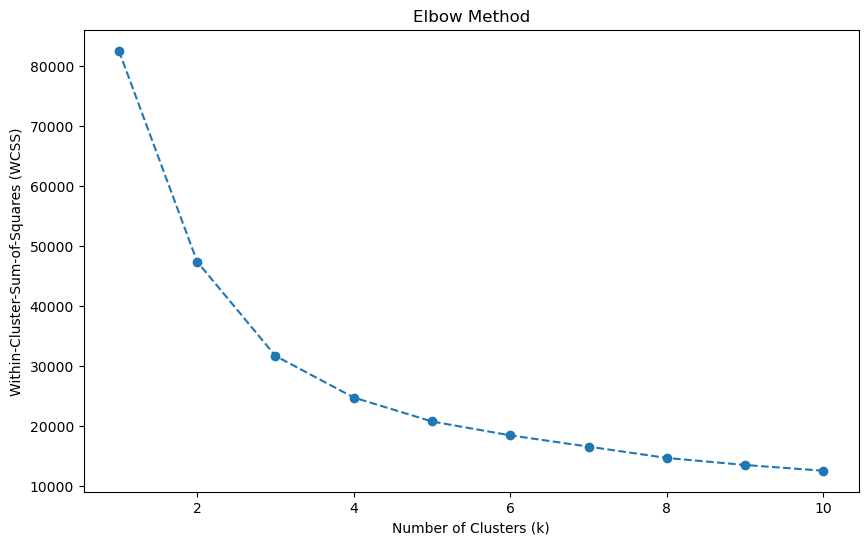

In [5]:
# Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')



/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412:

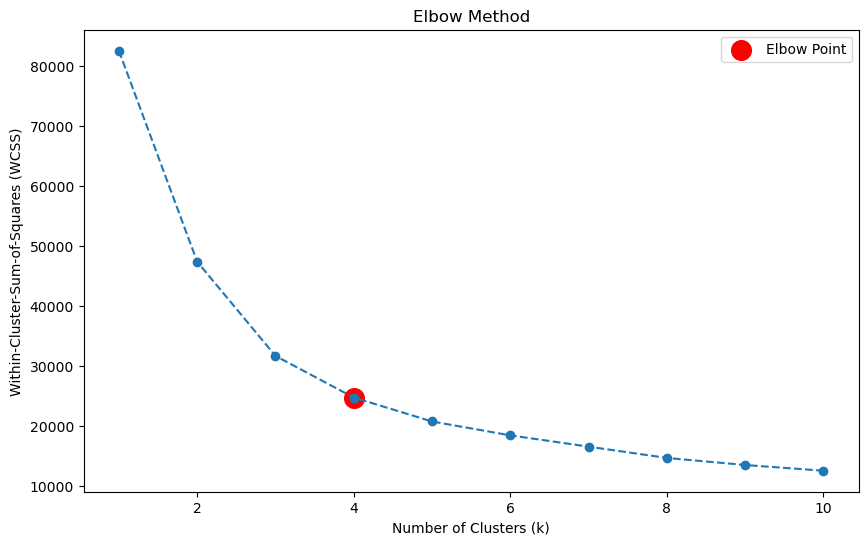

In [6]:
# Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')

# Highlight Elbow Point with a red dot
optimal_k = 4  
plt.scatter(optimal_k, wcss[optimal_k - 1], c='red', s=200, marker='o', label='Elbow Point')

plt.legend()
plt.show()


In [7]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
model = kmeans.fit(X)
centers = model.cluster_centers_

# Create a DataFrame with cluster information
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P


/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   longitude  latitude  median_house_value  median_income  prediction
0  -0.961280  1.144462           -0.654012      -0.493635           0
1   0.814542 -0.796249           -0.371564      -0.366350           1
2  -1.262145  0.926375            1.116377       0.929883           2
3   0.707646 -0.822162            1.392206       1.224313           3


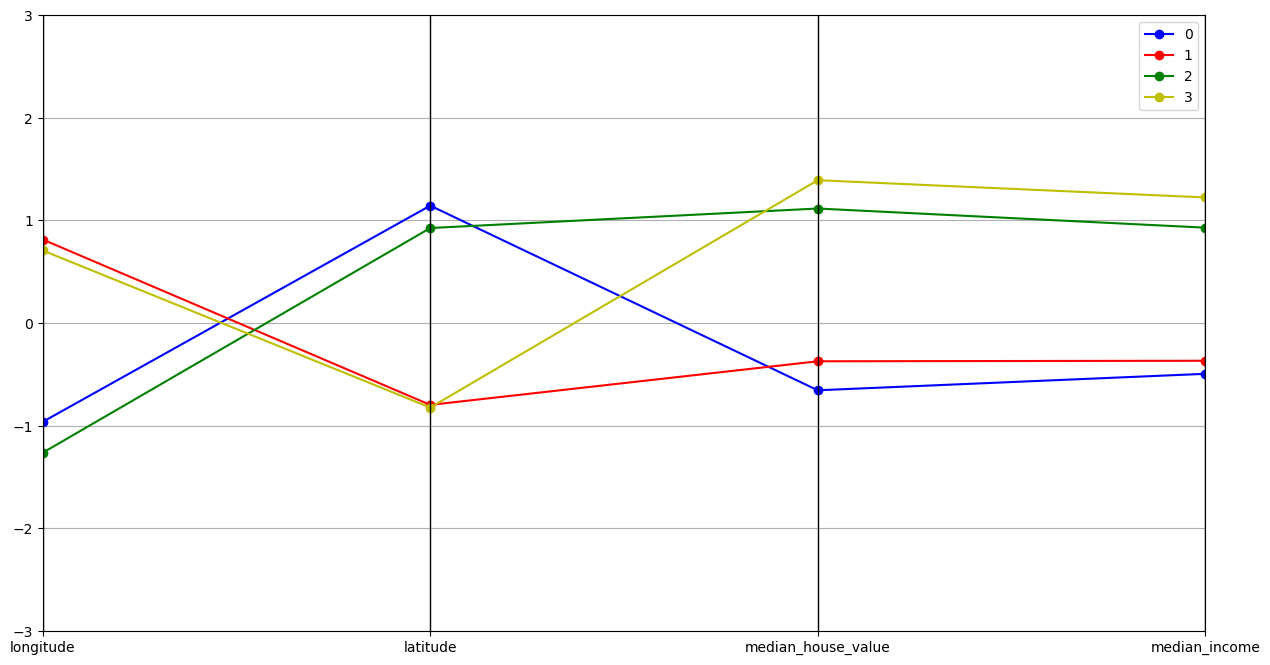

In [8]:
# Create parallel plots
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15, 8)).gca().axes.set_ylim([-3, +3])
    parallel_coordinates(data, 'prediction', color=my_colors, marker='o')

# Display cluster information and parallel plots
P = pd_centers(features, centers)
print(P)
parallel_plot(P)


/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


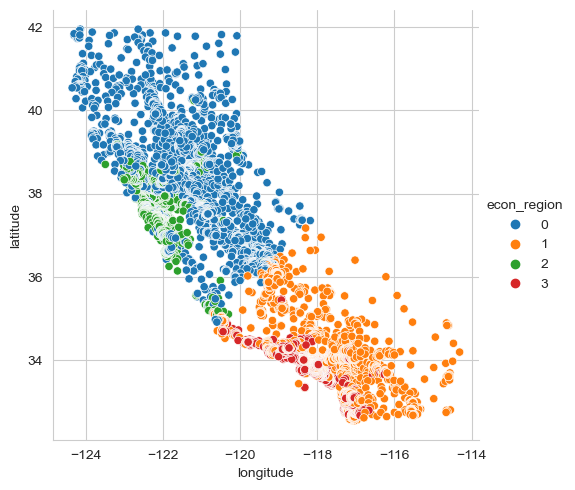


Median House Value Statistics (in USD):
             median_house_value
econ_region                    
0                      122000.0
1                      162050.0
2                      319100.0
3                      353100.0


In [9]:
# Create cluster label and visualize on a scatter plot
data['econ_region'] = kmeans.fit_predict(X)
data['econ_region'] = data['econ_region'].astype("category")

sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='econ_region', data=data, kind='scatter')
plt.show()

# Display statistics for each cluster based on median_house_value
median_attributes = ['econ_region', 'median_house_value']
median_house = data[median_attributes]
statistics = median_house.groupby(['econ_region']).median()

# Print statistics for each cluster with currency (US Dollars)
print("\nMedian House Value Statistics (in USD):")
print(statistics)



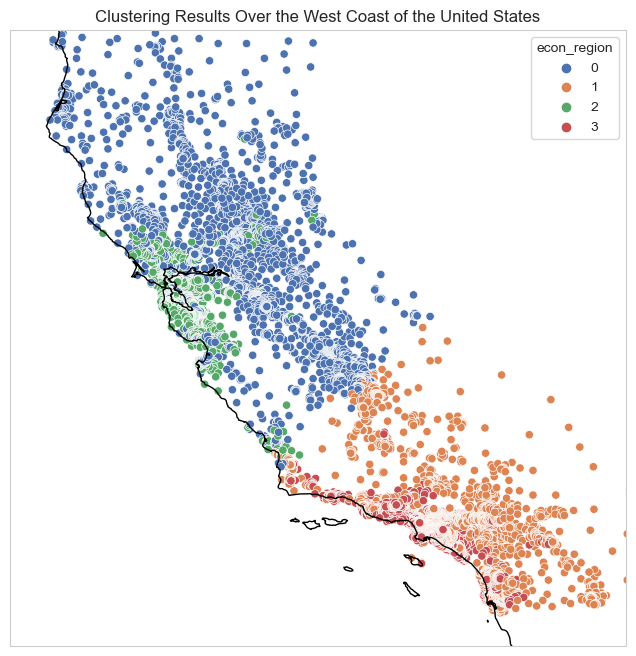


Median House Value Statistics (in USD):
             median_house_value
econ_region                    
0                      122000.0
1                      162050.0
2                      319100.0
3                      353100.0


In [10]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns

# Set the projection to a global PlateCarree projection
proj = ccrs.PlateCarree()

# Create a scatter plot with Cartopy
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=proj)

# Scatter plot using Seaborn with a more vibrant color palette
scatter = sns.scatterplot(x='longitude', y='latitude', hue='econ_region', data=data, palette='deep', ax=ax)

# Set plot details
ax.set_title('Clustering Results Over the West Coast of the United States')
ax.set_extent([-125, -115, 32, 42])  # Adjust the extent for the West Coast

# Add coastlines
ax.coastlines()

# Show the plot
plt.show()

# Display statistics for each cluster based on median_house_value
median_attributes = ['econ_region', 'median_house_value']
median_house = data[median_attributes]
statistics = median_house.groupby(['econ_region']).median()

# Print statistics for each cluster with currency (US Dollars)
print("\nMedian House Value Statistics (in USD):")
print(statistics)


/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


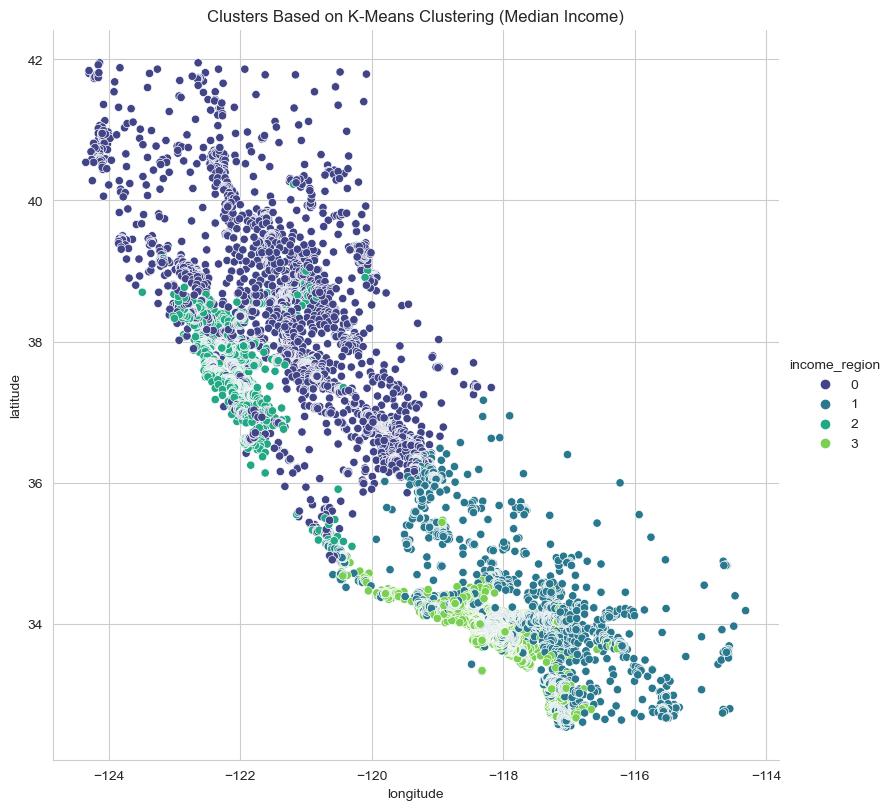


Median Income Statistics (in USD):
               median_income
income_region               
0                    28750.0
1                    31386.5
2                    52855.0
3                    58872.0


In [11]:
# Display cluster label and visualize on a scatter plot for median_income
data['income_region'] = kmeans.fit_predict(X)
data['income_region'] = data['income_region'].astype("category")

sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='income_region', data=data, kind='scatter', palette='viridis', height=8)
plt.title('Clusters Based on K-Means Clustering (Median Income)')
plt.show()

# Display statistics for each cluster based on median_income
median_attributes_income = ['income_region', 'median_income']
median_income = data[median_attributes_income]
statistics_income = median_income.groupby(['income_region']).median()

# Convert median_income to actual US Dollars
statistics_income['median_income'] *= 10000  # Convert from tens of thousands to actual dollars

# Print statistics for each cluster (median_income) in US Dollars
print("\nMedian Income Statistics (in USD):")
print(statistics_income)

# RAMAS AICI 
DE SCRIS DESPRE 
* comparatie harta income
* mari orase
* san fran in particular

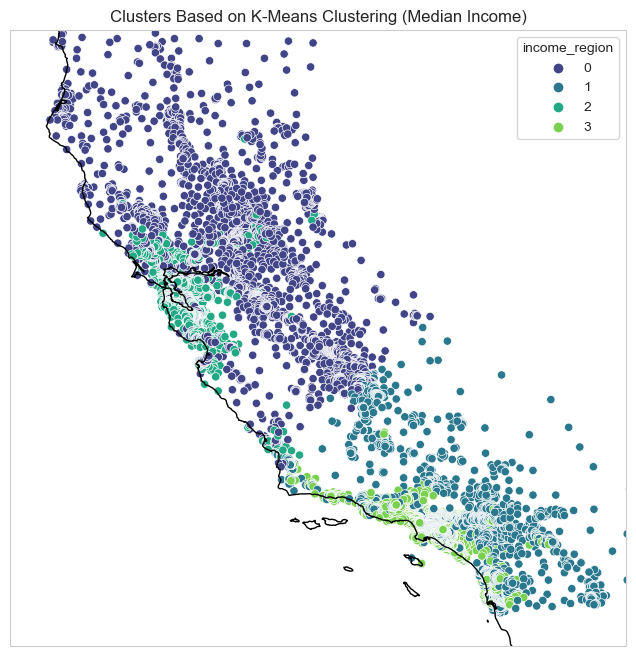


Median Income Statistics (in USD):
               median_income
income_region               
0                    28750.0
1                    31386.5
2                    52855.0
3                    58872.0


In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns

# Set the projection to a global PlateCarree projection
proj = ccrs.PlateCarree()

# Create a scatter plot with Cartopy for median_income clustering
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=proj)

# Scatter plot using Seaborn with a more vibrant color palette for median_income clustering
sns.scatterplot(x='longitude', y='latitude', hue='income_region', data=data, palette='viridis', ax=ax)

# Set plot details
ax.set_title('Clusters Based on K-Means Clustering (Median Income)')
ax.set_extent([-125, -115, 32, 42])  # Adjust the extent for the West Coast

# Add coastlines
ax.coastlines()

# Show the plot
plt.show()

# Display statistics for each cluster based on median_income
median_attributes_income = ['income_region', 'median_income']
median_income = data[median_attributes_income]
statistics_income = median_income.groupby(['income_region']).median()

# Convert median_income to actual US Dollars
statistics_income['median_income'] *= 10000  # Convert from tens of thousands to actual dollars

# Print statistics for each cluster (median_income) in US Dollars
print("\nMedian Income Statistics (in USD):")
print(statistics_income)


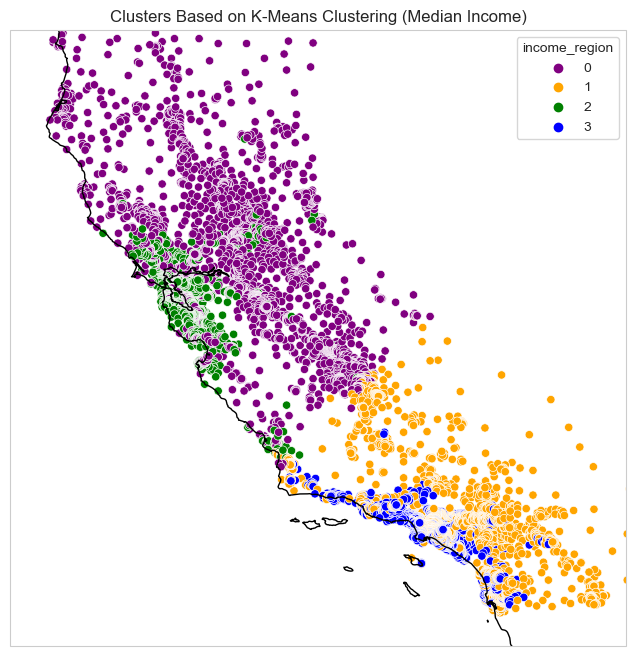


Median Income Statistics (in USD):
               median_income
income_region               
0                    28750.0
1                    31386.5
2                    52855.0
3                    58872.0


In [13]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns

# Set the projection to a global PlateCarree projection
proj = ccrs.PlateCarree()

# Create a scatter plot with Cartopy for median_income clustering
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=proj)

# Scatter plot using Seaborn with a custom color palette for median_income clustering
sns.scatterplot(x='longitude', y='latitude', hue='income_region', data=data,
                palette=['purple', 'orange', 'green', 'blue'], ax=ax)

# Set plot details
ax.set_title('Clusters Based on K-Means Clustering (Median Income)')
ax.set_extent([-125, -115, 32, 42])  # Adjust the extent for the West Coast

# Add coastlines
ax.coastlines()

# Show the plot
plt.show()

# Display statistics for each cluster based on median_income
median_attributes_income = ['income_region', 'median_income']
median_income = data[median_attributes_income]
statistics_income = median_income.groupby(['income_region']).median()

# Convert median_income to actual US Dollars
statistics_income['median_income'] *= 10000  # Convert from tens of thousands to actual dollars

# Print statistics for each cluster (median_income) in US Dollars
print("\nMedian Income Statistics (in USD):")
print(statistics_income)


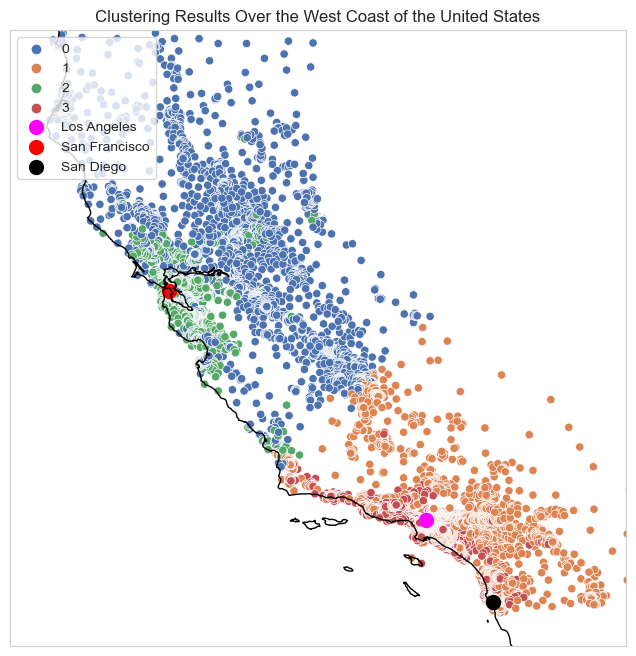

In [14]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns

# Set the projection to a global PlateCarree projection
proj = ccrs.PlateCarree()

# Create a scatter plot with Cartopy
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=proj)

# Scatter plot using Seaborn with a more vibrant color palette
sns.scatterplot(x='longitude', y='latitude', hue='econ_region', data=data, palette='deep', ax=ax)

# Mark specific cities with different colors
cities = {'Los Angeles': (-118.25, 34.05, 'magenta'),
          'San Francisco': (-122.42, 37.77, 'red'),
          'San Diego': (-117.16, 32.72, 'black')}

for city, (lon, lat, color) in cities.items():
    ax.scatter(lon, lat, color=color, s=100, label=city, transform=ccrs.PlateCarree())

# Set plot details
ax.set_title('Clustering Results Over the West Coast of the United States')
ax.set_extent([-125, -115, 32, 42])  # Adjust the extent for the West Coast

# Add coastlines
ax.coastlines()

# Add a legend for city markers
ax.legend(loc='upper left')

# Show the plot
plt.show()


/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/v6/mgsn_6c542v36jkxw7p418v80000gn/T/ipykernel_2462/3762099500.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_data['cluster_label'] = kmeans_sf.fit_predict(X)


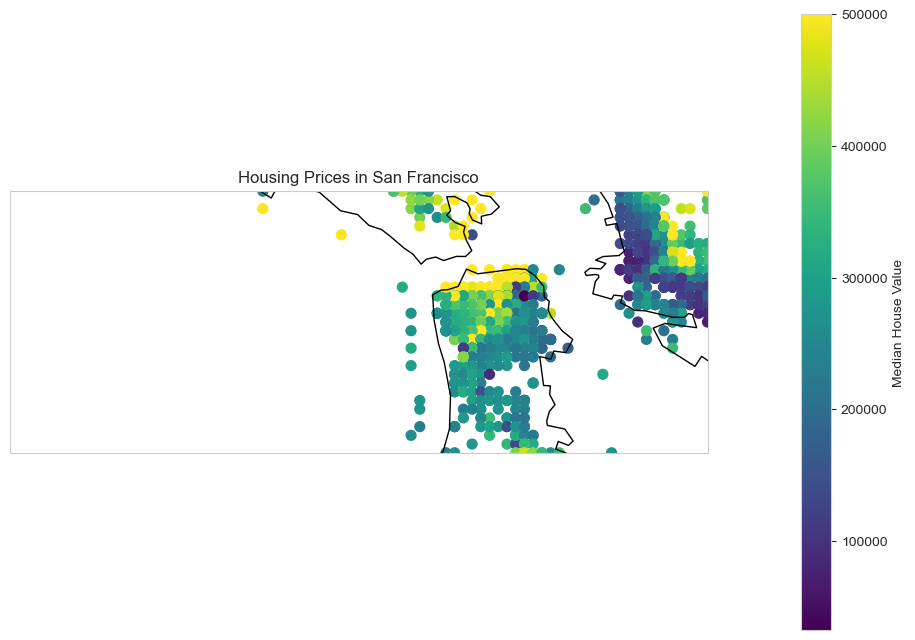

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import cartopy.crs as ccrs

# Filter data for San Francisco
sf_latitude_range = (37.6, 37.9)
sf_longitude_range = (-123, -122.2)
sf_data = data[(data['latitude'].between(*sf_latitude_range)) & (data['longitude'].between(*sf_longitude_range))]

# Select features for clustering
cluster_features = ['longitude', 'latitude', 'median_house_value']
cluster_df = sf_data[cluster_features]

# Scale the features
X = StandardScaler().fit_transform(cluster_df)

# Apply K-Means clustering
optimal_k_sf = 4  # Update with the identified optimal number of clusters for San Francisco
kmeans_sf = KMeans(n_clusters=optimal_k_sf, random_state=42)
sf_data['cluster_label'] = kmeans_sf.fit_predict(X)

# Plot the prices in San Francisco
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Scatter plot for house prices in San Francisco, colored by cluster
scatter = ax.scatter(sf_data['longitude'], sf_data['latitude'], c=sf_data['median_house_value'],
                     cmap='viridis', s=50, transform=ccrs.PlateCarree())

# Set plot details
ax.set_title('Housing Prices in San Francisco')
ax.set_extent(sf_longitude_range + sf_latitude_range)  # Adjust the extent for San Francisco

# Add coastlines
ax.coastlines()

# Add a colorbar for house prices
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('Median House Value')

# Show the plot
plt.show()


/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


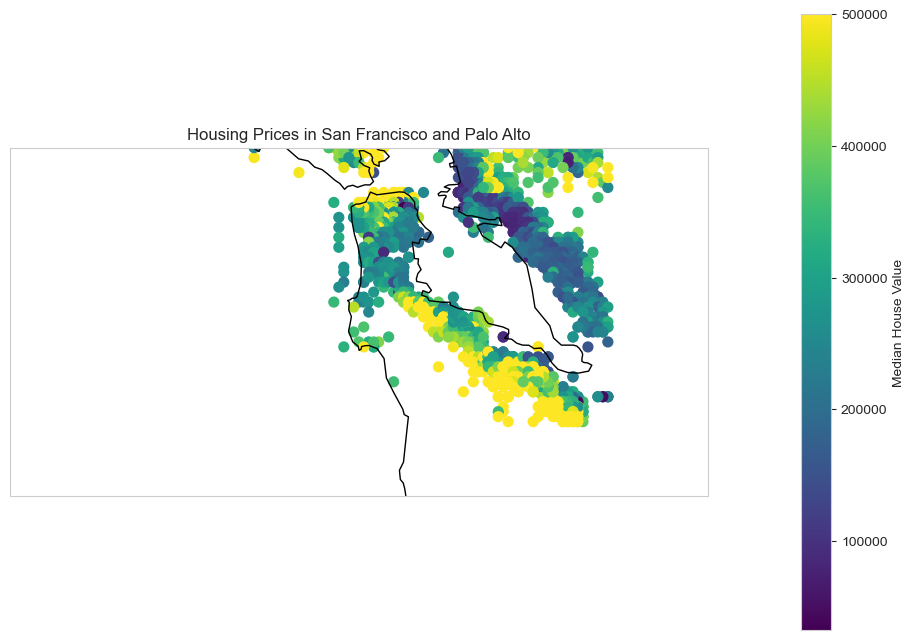

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import cartopy.crs as ccrs

# Filter data for San Francisco and Palo Alto
sf_latitude_range = (37.4, 37.9)
sf_longitude_range = (-123.2, -122)
palo_alto_coordinates = (-122.1430, 37.4419)

sf_data = data[(data['latitude'].between(*sf_latitude_range)) & (data['longitude'].between(*sf_longitude_range))]
palo_alto_data = data[(data['latitude'].between(palo_alto_coordinates[1]-0.1, palo_alto_coordinates[1]+0.1)) &
                      (data['longitude'].between(palo_alto_coordinates[0]-0.1, palo_alto_coordinates[0]+0.1))]

# Combine San Francisco and Palo Alto data
combined_data = pd.concat([sf_data, palo_alto_data])

# Select features for clustering
cluster_features = ['longitude', 'latitude', 'median_house_value']
cluster_df = combined_data[cluster_features]

# Scale the features
X = StandardScaler().fit_transform(cluster_df)

# Apply K-Means clustering
optimal_k_sf = 4  # Update with the identified optimal number of clusters for San Francisco
kmeans_sf = KMeans(n_clusters=optimal_k_sf, random_state=42)
combined_data['cluster_label'] = kmeans_sf.fit_predict(X)

# Plot the prices in San Francisco and Palo Alto
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Scatter plot for house prices in San Francisco and Palo Alto, colored by cluster
scatter = ax.scatter(combined_data['longitude'], combined_data['latitude'], c=combined_data['median_house_value'],
                     cmap='viridis', s=50, transform=ccrs.PlateCarree())

# Set plot details
ax.set_title('Housing Prices in San Francisco and Palo Alto')
ax.set_extent([-123.2, -121.8, 37.2, 37.9])  # Adjust the extent for San Francisco and Palo Alto

# Add coastlines
ax.coastlines()

# Add a colorbar for house prices
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('Median House Value')

# Show the plot
plt.show()


/var/folders/v6/mgsn_6c542v36jkxw7p418v80000gn/T/ipykernel_2462/1018142853.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['median_income'] *= 10000  # Convert from tens of thousands to actual dollars
/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


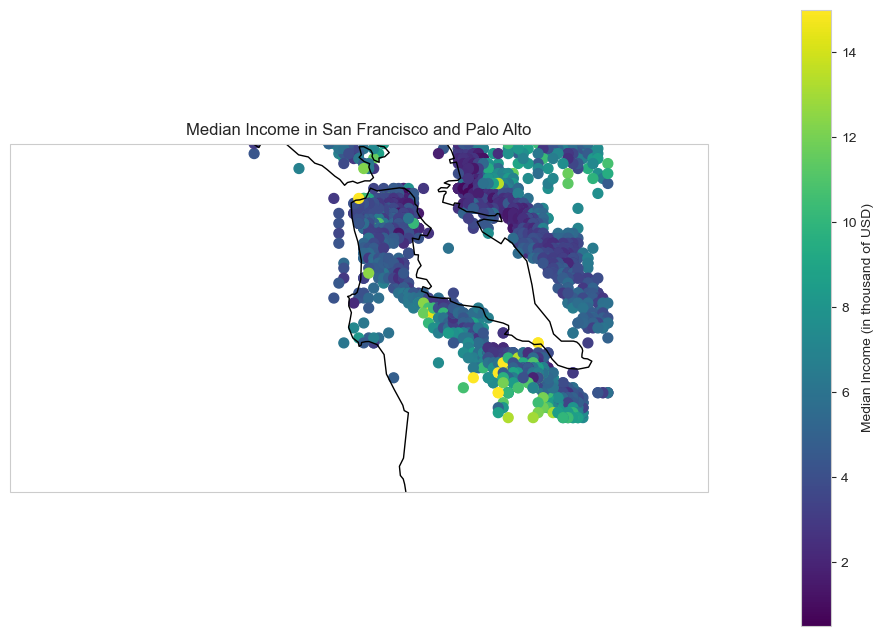

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import cartopy.crs as ccrs

# Filter data for San Francisco and Palo Alto
sf_latitude_range = (37.4, 37.9)
sf_longitude_range = (-123.2, -122)
palo_alto_coordinates = (-122.1430, 37.4419)

sf_data = data[(data['latitude'].between(*sf_latitude_range)) & (data['longitude'].between(*sf_longitude_range))]
palo_alto_data = data[(data['latitude'].between(palo_alto_coordinates[1]-0.1, palo_alto_coordinates[1]+0.1)) &
                      (data['longitude'].between(palo_alto_coordinates[0]-0.1, palo_alto_coordinates[0]+0.1))]

# Combine San Francisco and Palo Alto data
combined_data = pd.concat([sf_data, palo_alto_data])

# Select features for clustering
cluster_features = ['longitude', 'latitude', 'median_income']
cluster_df = combined_data[cluster_features]

# Convert median_income to actual dollars
cluster_df['median_income'] *= 10000  # Convert from tens of thousands to actual dollars

# Scale the features
X = StandardScaler().fit_transform(cluster_df[['longitude', 'latitude', 'median_income']])

# Apply K-Means clustering
optimal_k_sf = 4  # Update with the identified optimal number of clusters for San Francisco
kmeans_sf = KMeans(n_clusters=optimal_k_sf, random_state=42)
combined_data['cluster_label'] = kmeans_sf.fit_predict(X)

# Plot the median_income in San Francisco and Palo Alto
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Scatter plot for median_income in San Francisco and Palo Alto, colored by cluster
scatter = ax.scatter(combined_data['longitude'], combined_data['latitude'], c=combined_data['median_income'],
                     cmap='viridis', s=50, transform=ccrs.PlateCarree())

# Set plot details
ax.set_title('Median Income in San Francisco and Palo Alto')
ax.set_extent([-123.2, -121.8, 37.2, 37.9])  # Adjust the extent for San Francisco and Palo Alto

# Add coastlines
ax.coastlines()

# Add a colorbar for median_income
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('Median Income (in thousand of USD)')

# Show the plot
plt.show()
  